# 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [38]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [42]:
def fillna(primary_df: pd.DataFrame, transform_df: pd.DataFrame) -> pd.DataFrame:
	new_df = transform_df.copy()

	mean_age = primary_df["Age"].mean()
	mean_vip = primary_df['VIP'].value_counts().idxmax()
	mean_CryoSleep = primary_df['CryoSleep'].value_counts().idxmax()
	mean_RoomService = primary_df["RoomService"].mean()
	mean_FoodCourt = primary_df["FoodCourt"].mean()
	mean_ShoppingMall = primary_df["ShoppingMall"].mean()
	mean_Spa = primary_df["Spa"].mean()
	mean_VRDeck = primary_df["VRDeck"].mean()

	new_df["HomePlanet"].fillna("Undefined", inplace=True)
	new_df["CryoSleep"].fillna(mean_CryoSleep, inplace=True)
	new_df["Cabin"].fillna("Undefined/Undefined/Undefined", inplace=True)
	new_df["Destination"].fillna("Undefined", inplace=True)
	new_df["Age"].fillna(mean_age, inplace=True)
	new_df["VIP"].fillna(mean_vip, inplace=True)
	new_df["RoomService"].fillna(mean_RoomService, inplace=True)
	new_df["FoodCourt"].fillna(mean_FoodCourt, inplace=True)
	new_df["ShoppingMall"].fillna(mean_ShoppingMall, inplace=True)
	new_df["Spa"].fillna(mean_Spa, inplace=True)
	new_df["VRDeck"].fillna(mean_VRDeck, inplace=True)
	new_df["Name"].fillna("Undefined", inplace=True)
	
	return new_df

df_train_2 = fillna(df_train, df_train)

/var/folders/nm/_vhgd_nn6_q6j0v7y5gyx2p40000gn/T/ipykernel_8288/3108606854.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["HomePlanet"].fillna("Undefined", inplace=True)
/var/folders/nm/_vhgd_nn6_q6j0v7y5gyx2p40000gn/T/ipykernel_8288/3108606854.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [90]:
df_train_2.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [159]:
def transform_features(df: pd.DataFrame) -> pd.DataFrame:
	df_new = df.copy()
	cabins = df_new["Cabin"].astype(str).apply(lambda x: x.split("/"))
	cabins = pd.DataFrame(cabins.tolist(), columns=["Cabin_1", "Cabin_2", "Cabin_3"])
	df_new = pd.concat([df_new, cabins], axis=1)
	df_new = df_new.drop("Cabin", axis=1)
	categorical_cols = ["HomePlanet", "Destination"]
	df_new = pd.get_dummies(df_new, columns=categorical_cols, dtype=int)
	df_new["Transported"] = df_new["Transported"].astype(int)
	df_new["VIP"] = df_new["VIP"].astype(int)
	df_new["CryoSleep"] = df_new["CryoSleep"].astype(int)
	spent_cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
	df_new['TotalSpend'] = df[spent_cols].sum(1)
	df_new['GroupId'] = df['PassengerId'].str.split('_').str[0].astype(int)
	df_new['GroupSubId'] = df['PassengerId'].str.split('_').str[1].astype(int)
	return df_new

df_train_3 = transform_features(df_train_2)

In [160]:
df_train_3.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Undefined,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Undefined,TotalSpend,GroupId,GroupSubId
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,1,0,0,0,0,1,0,0.0,1,1
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,0,0,0,0,1,0,736.0,2,1
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,1,0,0,0,0,1,0,10383.0,3,1
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,1,0,0,0,0,1,0,5176.0,3,2
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0,0,0,0,0,1,0,1091.0,4,1


In [161]:
df_train_3.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Undefined,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Undefined,TotalSpend,GroupId,GroupSubId
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.349362,28.827930,0.022892,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624,0.529391,0.245140,0.202347,0.023122,0.207063,0.091568,0.680433,0.020936,1472.487559,4633.389624,1.517773
std,0.476796,14.339054,0.149568,659.739364,1594.434978,597.417440,1124.675871,1133.259049,0.500016,0.499164,0.430195,0.401772,0.150300,0.405224,0.288432,0.466336,0.143180,2799.915709,2671.028856,1.054241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,1.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,727.000000,4630.000000,1.000000
75%,1.000000,37.000000,0.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1461.000000,6883.000000,2.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35987.000000,9280.000000,8.000000


In [163]:
df_train_3["Transported"].value_counts(normalize=True)

Transported
1    0.503624
0    0.496376
Name: proportion, dtype: float64

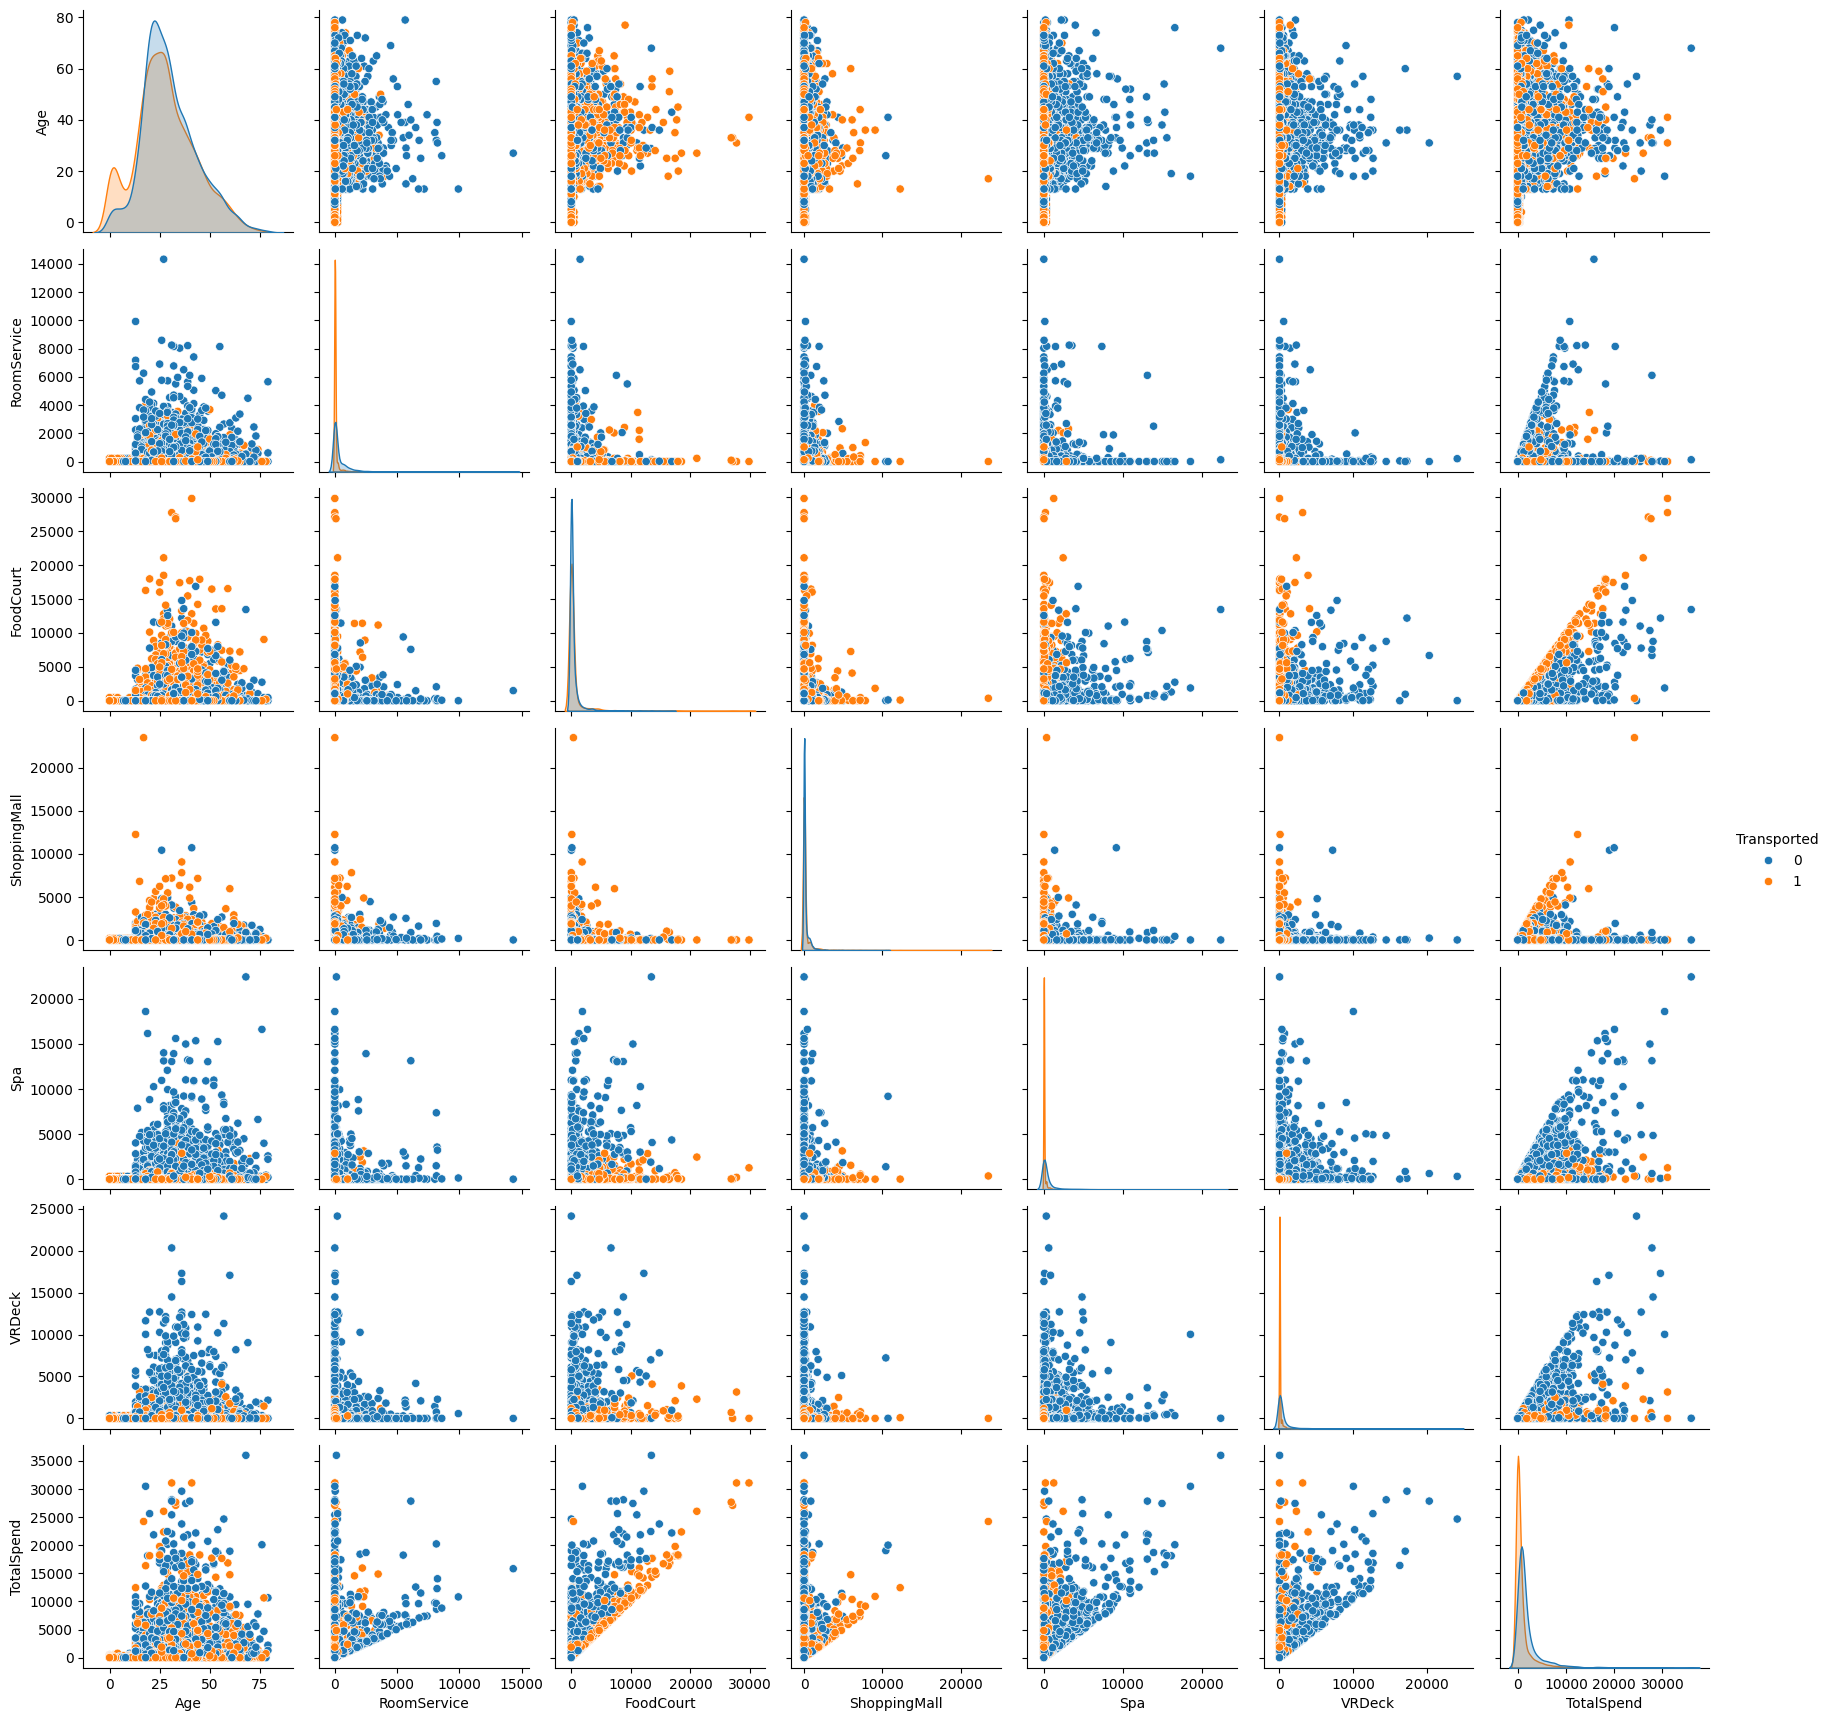

In [165]:
sns.pairplot(pd.concat([df_train_3.select_dtypes(include="float"), df_train_3[["Transported"]]], axis=1), hue="Transported")

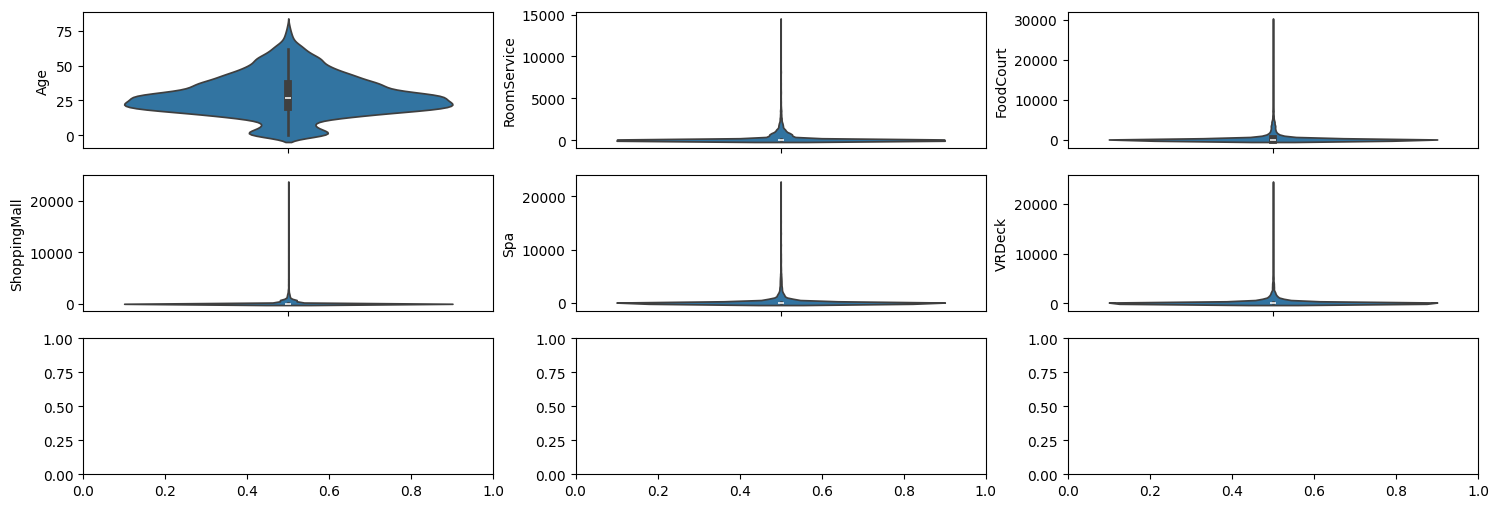

In [167]:
float_cols = df_train.select_dtypes(include=["float"]).columns
fig, axs = plt.subplots(3, 3, figsize=(18, 6))
for i, col in enumerate(float_cols):
    sns.violinplot(df_train_3[col], ax=axs[i//3, i%3])

<Axes: >

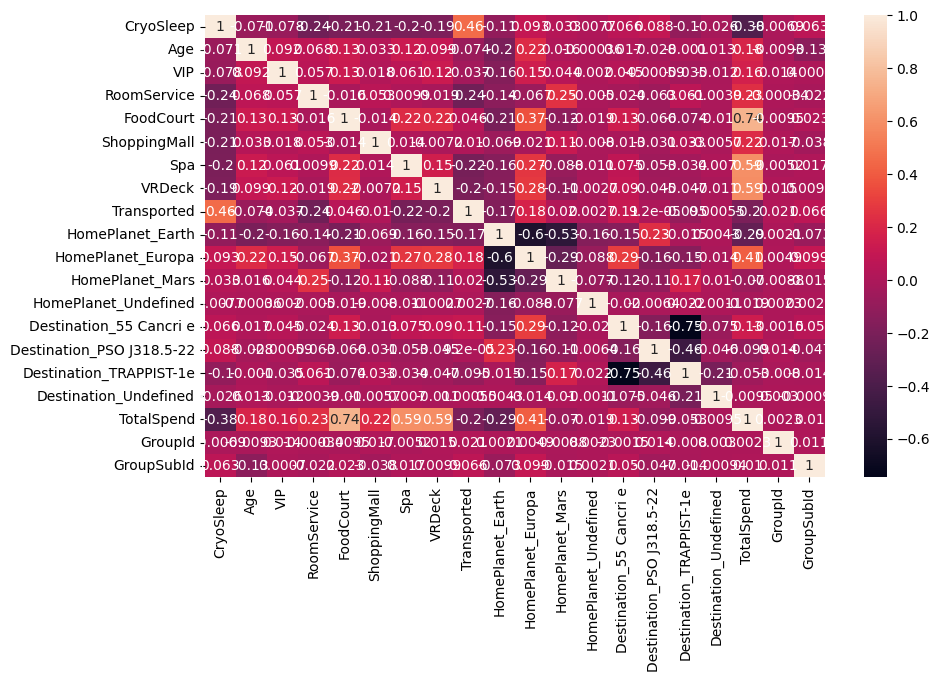

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(df_train_3.select_dtypes(include=["float", "int"]).corr(), annot=True, ax=ax)